INSTALL LIBRARIES AND LOAD DATASET

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [71]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [72]:
df.shape

# WE HAVE 237 ROWS AND 4 VARIABLES

(237, 4)

In [74]:
df.info()

# ALL COLUMNS ARE IN INT FORMAT.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [75]:
df.isnull().sum()

# THERE IS NO NULL VALUES IN DATASET

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [36]:
df.describe()

#WE CAN SEE SOME OUTLIER IN HEAD SIZE AS MEAN IS 3633 AND STD IS 365 SO AVG ACCEPTABLE VALUE IS FROM 3200 TO 4000 BUT WE HAVE 4747 AT HIGHER END.

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


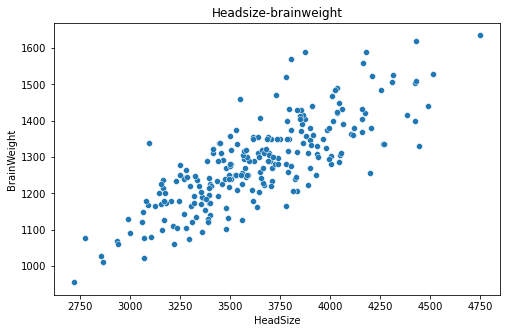

In [37]:
plt.figure(figsize = (8,5))
sns.scatterplot(data=df, x="HeadSize", y="BrainWeight").set_title('Headsize-brainweight')
plt.xticks
plt.show()

CONCLUSION:
    
    HEADSIZE AND BRAINWEIGHT IS IN PARALLEL AS HEADSIZE INCREASE THE WEIGHT OF BRAIN IS ALSO INCREASE.

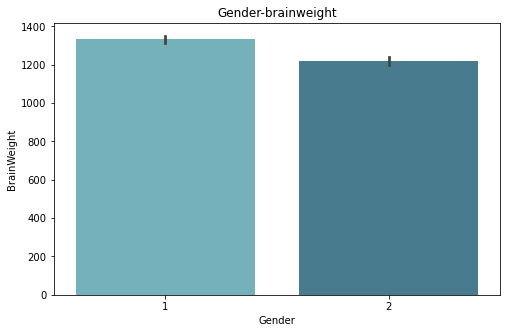

In [38]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Gender', y = 'BrainWeight', data = df, palette= 'GnBu_d').set_title('Gender-brainweight')
plt.xticks
plt.show()

CONCLUSION:
    
    NOT MUCH EFFECTIVE AS BOTH CASE HAVE NEARLY SAME AVG OF BRAINWEIGHT

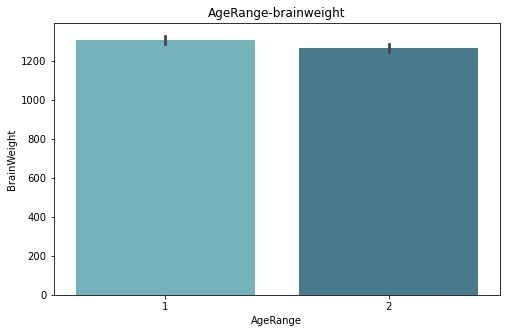

In [39]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'AgeRange', y = 'BrainWeight', data = df, palette= 'GnBu_d').set_title('AgeRange-brainweight')
plt.xticks
plt.show()

CONCLUSION:
    
    AGE RANGE IS ALSO NOT EFFECTIV AS BOTH RANGE HAVE SAME AVG SO IT NOT LOOKING MUCH EFFECTIVE.

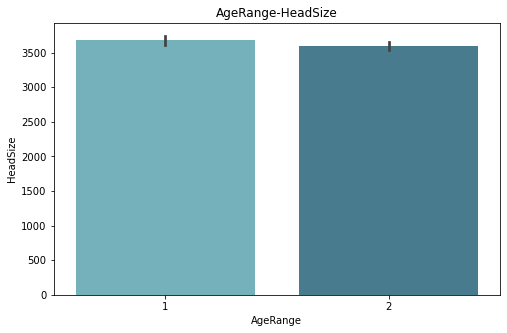

In [40]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'AgeRange', y = 'HeadSize', data = df, palette= 'GnBu_d').set_title('AgeRange-HeadSize')
plt.xticks
plt.show()

CONCLUSION:
    
    AGERANGE AND HEADSIZE HAVE NOT MUCH RELATIVE WITH EACH OTHER.

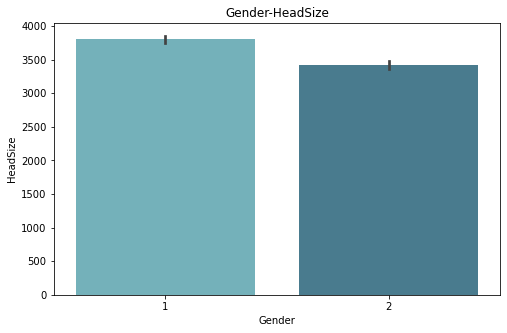

In [41]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'Gender', y = 'HeadSize', data = df, palette= 'GnBu_d').set_title('Gender-HeadSize')
plt.xticks
plt.show()

CONCLUSION:
    
    GENDER AND HEADSIZE HAVE NOT CO-RELATION WITH EACH OTHER.

In [42]:
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


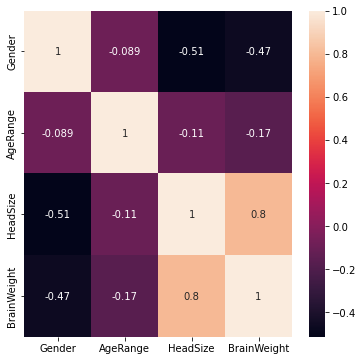

In [43]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot = True,linecolor="black")

EDA CONCLUSION:
    
    NOT MUCH HERE TO DISCUSS, WE CAN SAY THAT ONLY HEADSIZE HAVE CO-RELATION WITH BRAINWEIGHT.
    AS HEADSIZE INCREASE , BRAINWEIGHT IS ALSO INCREASE.

### DROP OUTLIERS

In [44]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

#We had 250 near ourliers, which we removed using Z-score technique

(237, 4)
(236, 4)


In [45]:
df_1.skew()

Gender         0.257959
AgeRange      -0.153968
HeadSize       0.164767
BrainWeight    0.205274
dtype: float64

In [77]:
feature_cols = ['HeadSize','Gender','AgeRange']
x= df_1[feature_cols] 
y = df_1.BrainWeight

SCALEDOWN

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [80]:
x_scaled

array([[ 2.46589809, -0.88002051, -1.0794154 ],
       [ 0.30372296, -0.88002051, -1.0794154 ],
       [ 1.7647276 , -0.88002051, -1.0794154 ],
       [ 0.41266977, -0.88002051, -1.0794154 ],
       [ 1.53007294, -0.88002051, -1.0794154 ],
       [-0.12368375, -0.88002051, -1.0794154 ],
       [ 0.43501784, -0.88002051, -1.0794154 ],
       [-0.19631495, -0.88002051, -1.0794154 ],
       [-0.04546553, -0.88002051, -1.0794154 ],
       [ 0.9853389 , -0.88002051, -1.0794154 ],
       [-0.52036187, -0.88002051, -1.0794154 ],
       [ 1.01606748, -0.88002051, -1.0794154 ],
       [ 0.02995919, -0.88002051, -1.0794154 ],
       [ 1.61667168, -0.88002051, -1.0794154 ],
       [ 0.56631271, -0.88002051, -1.0794154 ],
       [ 0.68922706, -0.88002051, -1.0794154 ],
       [-0.36951244, -0.88002051, -1.0794154 ],
       [-0.45611119, -0.88002051, -1.0794154 ],
       [-1.49250262, -0.88002051, -1.0794154 ],
       [ 2.22006939, -0.88002051, -1.0794154 ],
       [ 0.69481407, -0.88002051, -1.079

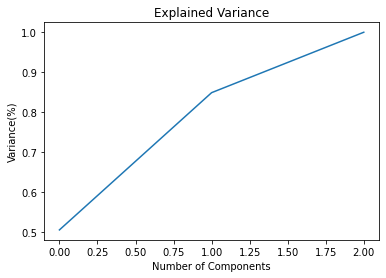

In [79]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

# here we go with all features

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.25,random_state = 50) 

In [61]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Testing:-',ln.score(x_test,y_test)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 63.99667071339575
Testing:- 63.00644264595656
Error
MAE 59.21488578443347
MSE 5056.453706522276
RMSE 71.10874564019728
R2 Score 63.00644264595656


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [63]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

In [64]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('Testing:-',f.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

DECISIONTREE REGRESSOR

In [65]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('Testing:-',dtr.score(x_test,y_test)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 97.99116589638284
Testing:- 19.087047446962334
MAE 86.05932203389831
MSE 11059.563559322034
RMSE 105.16445958270329
R2 Score 19.087047446962334


KNN

In [66]:
fun(kn)

TRAINING:- 70.87850764609365
Testing:- 54.401853486683116
MAE 66.02711864406777
MSE 6232.569491525422
RMSE 78.94662432001397
R2 Score 54.401853486683116


RANDOMFOREST REGRESSOR

In [67]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 92.55884706783681
Testing:- 45.67899685620248
MAE 69.98036723163843
MSE 7424.8506316855
RMSE 86.1675729708427
R2 Score 45.67899685620248


DECISIONTREE REGRESSOR

In [68]:
fun(dtr)

TRAINING:- 97.99116589638284
Testing:- 25.192400903842948
MAE 84.33050847457628
MSE 10225.055084745763
RMSE 101.11901445695445
R2 Score 25.192400903842948


SUPPORT VECTOR REGRESSOR

In [69]:
fun(svr)

TRAINING:- 18.058112439421492
Testing:- 15.202560005036803
MAE 84.18440823247184
MSE 11590.513603830708
RMSE 107.65924764659424
R2 Score 15.202560005036803


In [81]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 68.14395737165806
Testing:- 53.22634473365658
MAE 65.83303460158305
MSE 6393.243566051555
RMSE 79.95776113706258
R2 Score 53.22634473365658


In [82]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
fun(gd)

TRAINING:- 87.40066799622856
Testing:- 48.131911942928284
MAE 69.92730060300742
MSE 7089.574641237844
RMSE 84.19961188294067
R2 Score 48.131911942928284


In [83]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(svr,x_scaled,y,cv=5)
print("score of cross validation score for svr", score.mean()*100)
score=cross_val_score(dtr,x_scaled,y,cv=5)
print("score of cross validation score for dtr",score.mean()*100)
score=cross_val_score(rd,x_scaled,y,cv=5)
print("score of cross validation score for rd",score.mean()*100)
score=cross_val_score(gd,x_scaled,y,cv=5)
print("score of cross validation score for Gd",score.mean()*100)
score=cross_val_score(ad,x_scaled,y,cv=4)
print("score of cross validation score for ad",score.mean()*100)

score of cross validation score for svr -35.699678275162285
score of cross validation score for dtr -17.819650989224808
score of cross validation score for rd 32.809176542092885
score of cross validation score for Gd 32.25808183874795
score of cross validation score for ad 30.854588983301166
